                                                                                   Paula penedo and Vega Vázquez

# Project 2: Artificial Intelligence               

# Unit 4: Non-Parametric Methods 

### Reminder of meanings of variables 

Variables used: 

1) bia.di: A numerical vector, respondent's biacromial diameter in centimeters

2) bii.di: A numerical vector, respondent's biiliac diameter (pelvic breadth) in centimeters.

3) bit.di: A numerical vector, respondent's bitrochanteric diameter in centimeters.

4) che.de: A numerical vector, respondent's chest depth in centimeters, measured between spine and sternum at nipple level, mid-expiration.

5) che.di: A numerical vector, respondent's chest diameter in centimeters, measured at nipple level, mid-expiration.

6) elb.di: A numerical vector, respondent's elbow diameter in centimeters, measured as sum of two elbows.

7) wri.di: A numerical vector, respondent's wrist diameter in centimeters, measured as sum of two wrists.

8) kne.di: A numerical vector, respondent's knee diameter in centimeters, measured as sum of two knees.

9) ank.di: A numerical vector, respondent's ankle diameter in centimeters, measured as sum of two ankles.

10) sho.gi: A numerical vector, respondent's shoulder girth in centimeters, measured over deltoid muscles.

11) che.gi: A numerical vector, respondent's chest girth in centimeters, measured at nipple line in males and just above breast tissue in females, mid-expiration.

12) wai.gi: A numerical vector, respondent's waist girth in centimeters, measured at the narrowest part of torso below the rib cage as average of contracted and relaxed position.

13) nav.gi: A numerical vector, respondent's navel (abdominal) girth in centimeters, measured at umbilicus and iliac crest using iliac crest as a landmark.

14) hip.gi: A numerical vector, respondent's hip girth in centimeters, measured at at level of bitrochanteric diameter.

15) thi.gi: A numerical vector, respondent's thigh girth in centimeters, measured below gluteal fold as the average of right and left girths.

16) bic.gi: A numerical vector, respondent's bicep girth in centimeters, measured when flexed as the average of right and left girths.

17) for.gi: A numerical vector, respondent's forearm girth in centimeters, measured when extended, palm up as the average of right and left girths.

18) kne.gi: A numerical vector, respondent's knee diameter in centimeters, measured as sum of two knees.

19) cal.gi: A numerical vector, respondent's calf maximum girth in centimeters, measured as average of right and left girths.

20) ank.gi: A numerical vector, respondent's ankle minimum girth in centimeters, measured as average of right and left girths.

21) wri.gi: A numerical vector, respondent's wrist minimum girth in centimeters, measured as average of right and left girths.

22) age: A numerical vector, respondent's age in years.

23) wgt: A numerical vector, respondent's weight in kilograms.

24) hgt: A numerical vector, respondent's height in centimeters.

25) sex: A categorical vector, 1 if the respondent is male, 0 if female.
 

In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib
import matplotlib.pyplot as plt

In [169]:
#Load data from csv and store it in dataframe
#path = './project_2_AI/'
#filename = 'bdim.csv'
data = pd.read_csv("bdim.csv") #We can change this database
# We show the first 
#df = pd.read_csv(path + filename)
data.head() 

,bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,sho_gi,...,bic_gi,for_gi,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,sex
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1


## 1- 1. Model Selection and evaluation on $K-$NN

Since we saw on the first laboratory, **we do not have imbalance classes** we split our data normally to have the same proportion of class labels in the train and test set


In [170]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['sex'], axis=1), data['sex'], 
    test_size=0.3, 
    random_state=42, 
    
)

print('- Train size:', X_train.shape)
print('- Test size:', X_test.shape)

print('\n- Train target distribution: ', y_train.value_counts().values/len(y_train))
print('- Test target distribution:  ',y_test.value_counts().values/len(y_test))

- Train size: (354, 24)
- Test size: (153, 24)

- Train target distribution:  [0.51694915 0.48305085]
- Test target distribution:   [0.50326797 0.49673203]


### Standarize/normalize variables

$K-$NN and MLP require the input data to be standarized

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm  = scaler.transform(X_test)

## 1.1 Let's set a baseline

Before running our algorithms it is always a good practice to build a baseline model, so you we have a reference of what the results should be.

- In `src.utils` you have implemented some functions to help us calculating and representing different classification metrics. 

- The `analyze_train_test_performance` function provides a comparative summary between training and test metrics.

we are overfitting a little bit but since our database is very good built, results tend to be really high.
**avergiguar que le pasa al TRUE POSITIVE del test**


PERFORMANCE METRICS
	TRAIN	TEST
ACC:	99.44	99.35
SEN:	98.83	98.68
ESP:	100.00	100.00
PPV:	100.00	100.00
F1:	99.41	99.34


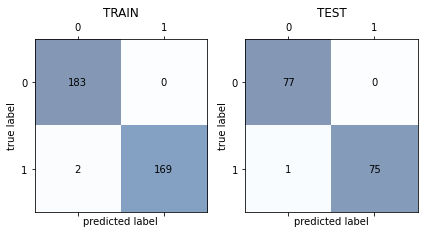

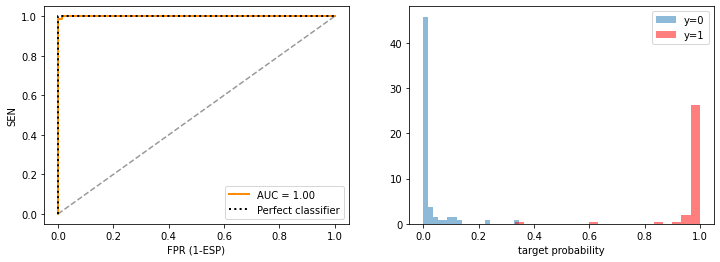

In [87]:
from sklearn.linear_model import LogisticRegression
from src.utils import analyze_train_test_performance  
 
# Logistic regression
lr_model = LogisticRegression().fit(X_train_norm,y_train)

# This a custom function, take a look in src.utils
analyze_train_test_performance(lr_model,X_train_norm,X_test_norm,y_train,y_test)

As we can see, on the left part is  easy to distinguish between 0 and 1 as well as the right part.<br>
In between there is few/minimal overlaping that can be barely distinguished.<br>
On that overlapping, we are reprenseting P(y=1/x) as well as, P(y=0/x) being x the given data 
We could move the threshold in order to avoid some overlapping but since here, it is minimum, we find it not necessary

## 1.2 Model selection: *GridSearch* 

We are going to sweep different values of the parameters of each algorithm, to determine its optimal value. In this sweep, we will use a cross-validation strategy, but never the test set!

To do so, we will be using the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) function.

In [172]:
from sklearn.model_selection import GridSearchCV

# These are customized functions: should be in utils.py
def hyper_parameters_search(clf, X, y, param_grid, scorer = 'f1', cv=5):
    
    grid = GridSearchCV(clf, param_grid = param_grid, scoring = scorer, cv = cv)
    grid.fit(X, y)

    print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
    print("best parameters: {}".format(grid.best_params_))
    
    return grid

def plot_cv_scoring(grid, hyper_parameter, scorer = 'f1', plot_errors = False, log=False):
    
    scores = np.array(grid.cv_results_['mean_test_score'])
    std_scores = grid.cv_results_['std_test_score']
        
    params = grid.param_grid[hyper_parameter]
    
    if log:
        params = np.log10(params)
    
    if plot_errors:
        plt.errorbar(params,scores,yerr=std_scores, fmt='o-',ecolor='g')
    else:
        plt.plot(params,scores, 'o-')
    plt.xlabel(hyper_parameter,fontsize=14)
    plt.ylabel(scorer)
    plt.show()

Since K-NN Algorithm can be used for classification purposes, we intended to test it on our binary classification problem (either is a female or a male). K-NN finds a predefined number (k) of training samples closest to a new point and predict the label/value from these.<br>
We use a range of 50 number of neightbors since our dataset is very large, as an ouput we obtain a mean cross-validation score of 0,98 with only 1 neightbor.<br>
Regarding the error graphics, the blue line representing the mean value, notice how the more neightbors we have the less accuracy is obtained **porque**. The green line represents the standard deviation, which on this database is really high, meaning that, there is a **lot of variablitiy in this fold.**


best mean cross-validation score: 0.980
best parameters: {'n_neighbors': 1}


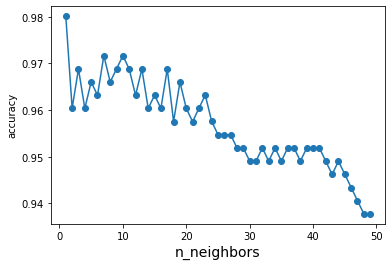

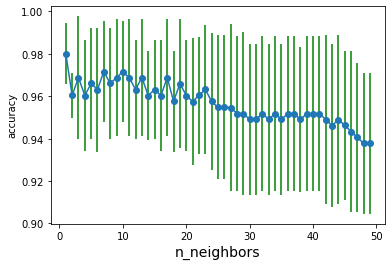

In [100]:
from sklearn.neighbors import KNeighborsClassifier

# Metric for the scoring
scorer = 'accuracy'  

# param_grid
param_grid = {'n_neighbors': range(1,50)}

# Our customized function
grid_knn = hyper_parameters_search(KNeighborsClassifier(), X_train_norm, y_train, param_grid, scorer = scorer)

# do the plotting
plot_cv_scoring(grid_knn,'n_neighbors',scorer)
plot_cv_scoring(grid_knn,'n_neighbors',scorer, plot_errors= True )


The K-NN calculates the closer k elements, with less distance. With k = n_neightbors, we know that the best is 1, with an accuracy of 0.98.
The more neightbors we have, less accuracy is obtained because it is a method that is not very recommended to datasets with lot of data.

## 1.3 Model evaluation

Once we have selected the model (hyper)-parameters, we evaluate its performance

PERFORMANCE METRICS
	TRAIN	TEST
ACC:	100.00	96.08
SEN:	100.00	96.05
ESP:	100.00	96.10
PPV:	100.00	96.05
F1:	100.00	96.05


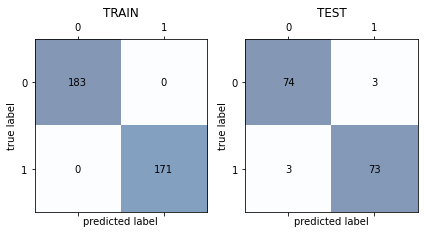

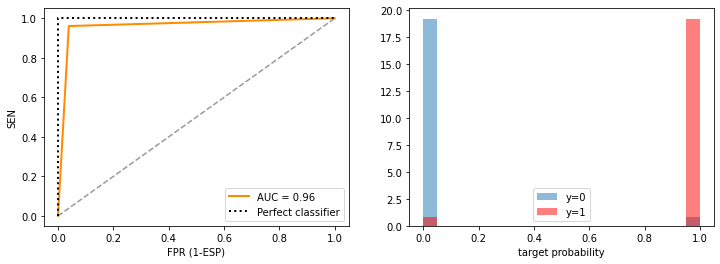

In [101]:
knn_model =  KNeighborsClassifier(**grid_knn.best_params_).fit(X_train_norm,y_train)

analyze_train_test_performance(knn_model,X_train_norm,X_test_norm,y_train,y_test)


It does overfit a little bit since the performance on the training set is perfect and in the validation test is lower. Results are worse than on our baseline model with an accuracy of 96%, however, **performance is still good.**<br>
The squares, separated in train and test sets are the classificaiton metrics.<br>
They indicate, from left to rigth and from up to down, the true negatives, false positives, false negatives and true positivies.<br>
We can see that the number of true negatives is bigger than the number of true positives.<br>
We also measure the accuracy, which is defined as the percentage of correct predicitons for the test data. It can be calculated by dividing the coorect predictions by the number of total predicitons, being the best 1, as we saw in the baseline model.<br>
In this case the accuracy is near to one, is 96% in the test set, so the model has a good accuracy.<br>

# 2. Decision trees (DTs)

We will repeat the above process for DTs. In this case, the hyper-parameter is `max_depth`.<br>
Since it is a non parametric supervised learning method used for classification and regression, we will use it for binary classification, with our outcome as sex (either a male or a female). <br>
The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features



## 2.1 Model selection

best mean cross-validation score: 0.921
best parameters: {'max_depth': 3}


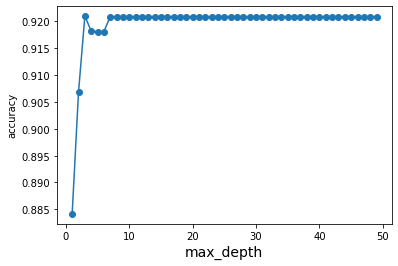

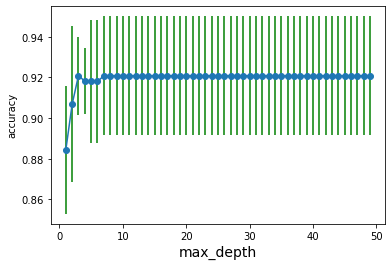

In [102]:
from sklearn.tree import DecisionTreeClassifier

# Decision trees
param_grid = {'max_depth': range(1,50)}


# Metric for the scoring
scorer = 'accuracy'  


# Our customized function
grid_dt = hyper_parameters_search(DecisionTreeClassifier(random_state=0), X_train_norm, y_train, param_grid, scorer = scorer)

# do the plotting
plot_cv_scoring(grid_dt,'max_depth',scorer)
plot_cv_scoring(grid_dt,'max_depth',scorer, plot_errors= True )


## 2.2 Model evaluation

PERFORMANCE METRICS
	TRAIN	TEST
ACC:	96.33	92.16
SEN:	97.08	94.74
ESP:	95.63	89.61
PPV:	95.40	90.00
F1:	96.23	92.31


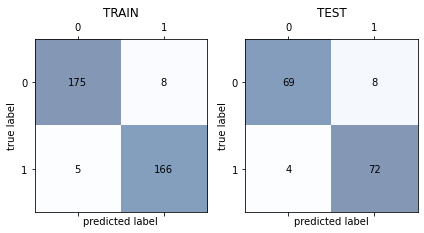

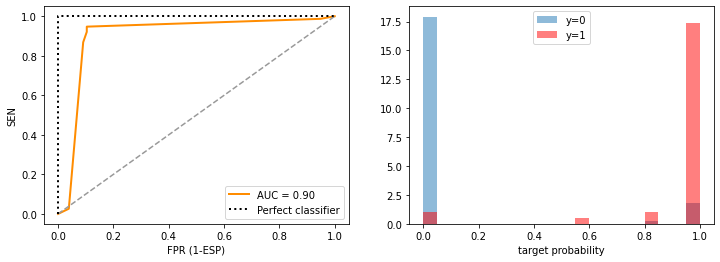

In [107]:
dt_model =  DecisionTreeClassifier(random_state=0, max_depth=3).fit(X_train_norm,y_train)

analyze_train_test_performance(dt_model,X_train_norm,X_test_norm,y_train,y_test)



It overfits a little bit on the training set having a higher value that the one on the test set. Performance is worse than on the baseline model with a **92,16% accuracy**, however it is still very good. 

## 2.3 DTs visualization

Trees can be visualized using the [`plot_tree`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree) function

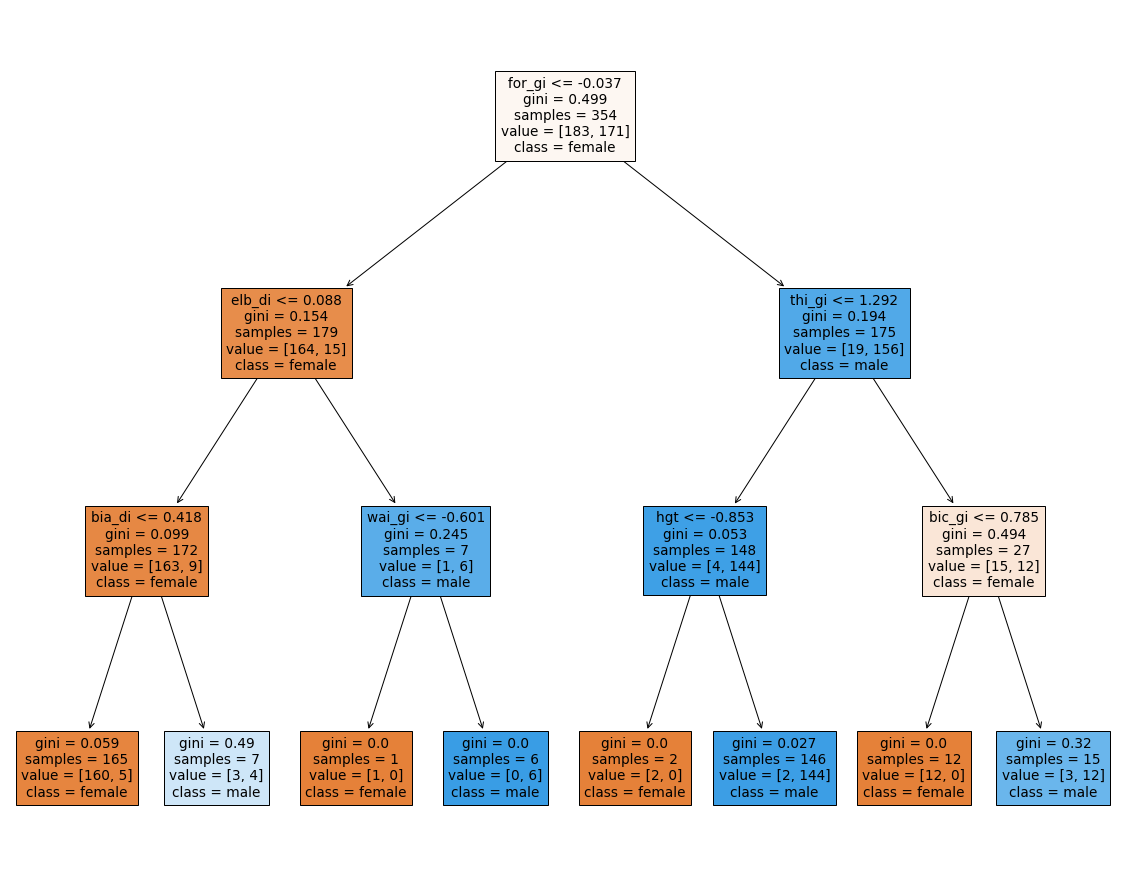

In [104]:
from sklearn.tree import plot_tree

# set plot dimensions
plt.figure(figsize=(20,16))

feature_names=data.columns.drop('sex')

plot_tree(
    dt_model,
    feature_names=feature_names, 
    class_names=['female','male'], 
    filled=True
)

plt.show()

The tree makes almost no assumptions about target function but it is **highly susceptible to variance in data**, which means that, decision trees are example of model with low bias and high variance.<br>
If the number of levels is too high i.e a complicated decision tree, the model tends to overfit. When there are too many decision nodes to go through before arriving at the result i.e number of nodes to traverse before reaching the leaf nodes is high, the conditions that you are checking against becomes multiplicative. Only if all the conditions are satisfied, a decision is reached. As you can see, this will work very well for the training set as you are continuously narrowing down on the data. The tree becomes highly tuned to the data present in the training set. But when a new data point is fed, even if one of the parameters deviates slightly, the condition will not be met and it will take the wrong branch.<br>
The higher the max depth parameter is, the less bias we will have and more variance we will have. This means that, the **narrower** our tree goes, the **more overfitting** we will performed, therefore, it is a **trade-off** between those parameters, if we increase the optimal value of our model, we will overfit the model. 

PERFORMANCE METRICS
	TRAIN	TEST
ACC:	100.00	93.46
SEN:	100.00	94.74
ESP:	100.00	92.21
PPV:	100.00	92.31
F1:	100.00	93.51


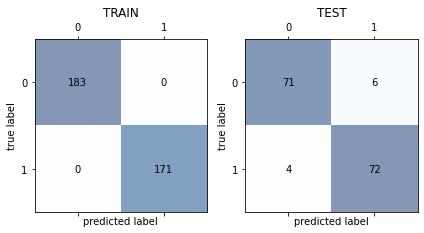

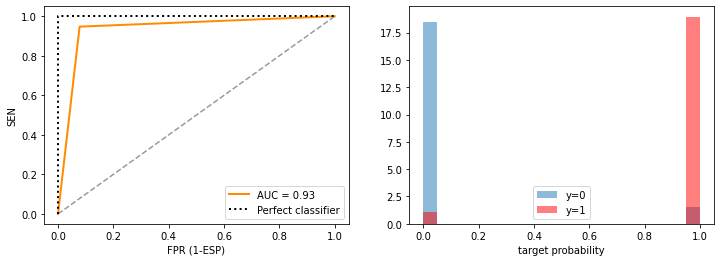

In [109]:
dt_model =  DecisionTreeClassifier(random_state=0, max_depth=10).fit(X_train_norm,y_train)

analyze_train_test_performance(dt_model,X_train_norm,X_test_norm,y_train,y_test)


Notice how accuracy increases at cost of increasing variance.

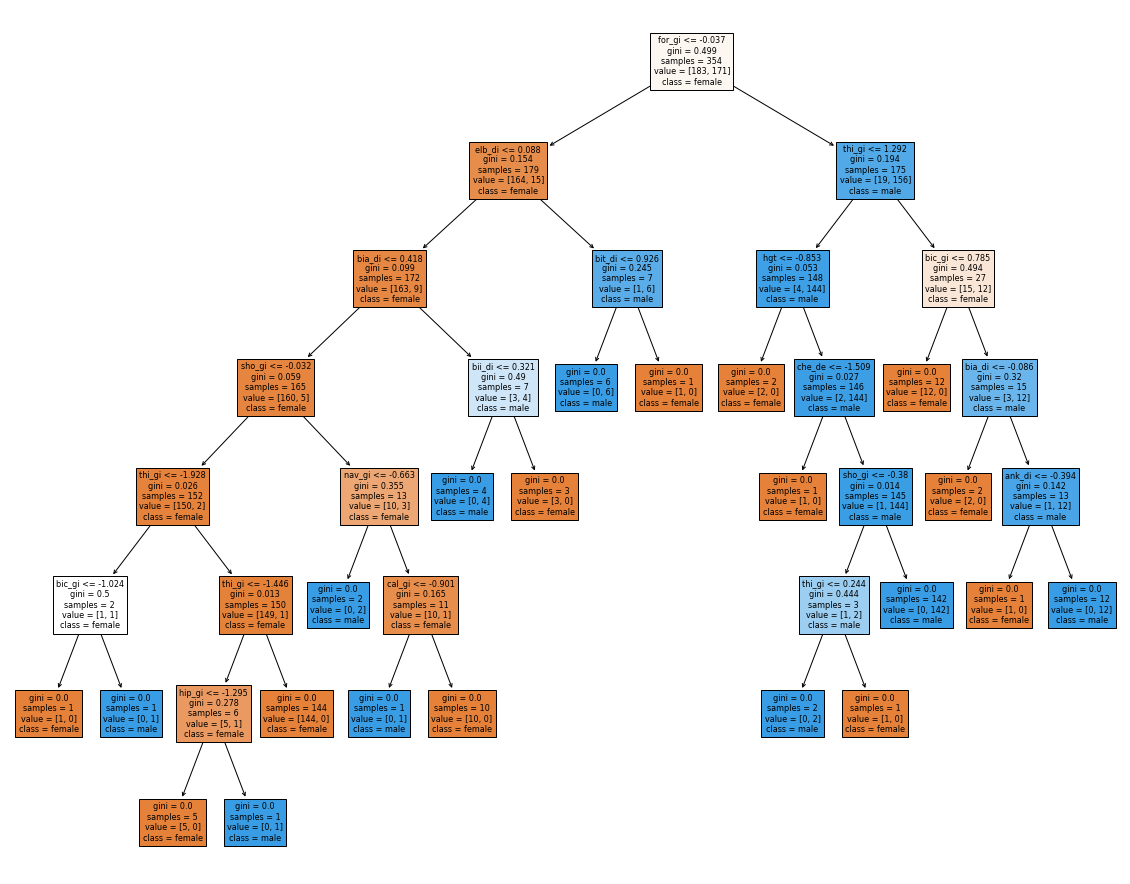

In [115]:
from sklearn.tree import plot_tree

# set plot dimensions
plt.figure(figsize=(20,16))

feature_names=data.columns.drop('sex')

plot_tree(
    dt_model,
    feature_names=feature_names, 
    class_names=['female','male'], 
    filled=True
)
plt.show()

## 2.4 Feature importance

Regarding feature importance, we will plot which features influence more on the DTs algorithm.

In [116]:
# feature importance
def plot_importances(importances, feat_names):
    
    data_importances = pd.Series(importances, index=feat_names)
    
    plt.figure()
    data_importances.plot.bar()
    plt.ylabel("Feature Importance")
    plt.show()

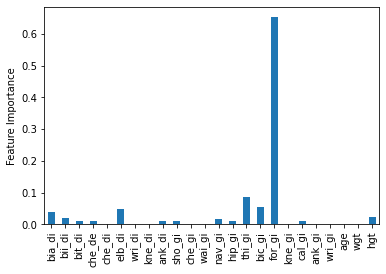

In [117]:
# Plot feature importance
plot_importances(dt_model.feature_importances_, feature_names)

We see how ***for_gi, thi_gi, bic_gi*** and ***elb_di*** are the most important features for this algorithm with almost 60% of importance.


# 3. Random Forest (RF)

As we saw before, Decision Trees algorithm tends to have a very high variance and a low bias, therefore, we aim to **reduce the variance** of the estimator by averaging, using Random Forest algorithm.<br>
We generate a forest of B decision trees whose predictions are combined to solve classification or regression task, in our case, as before, it is a binary classification, with our outcome being sex (either a female or a male).<br>



In [118]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth': range(1,5),
              'n_estimators' : [50,100,200,500,1000]}

# Metric for the scoring
scorer = 'accuracy' 

# Our customized function
grid_rf = hyper_parameters_search(RandomForestClassifier(random_state=0), X_train_norm, y_train, param_grid, scorer = scorer)



best mean cross-validation score: 0.941
best parameters: {'max_depth': 4, 'n_estimators': 1000}


PERFORMANCE METRICS
	TRAIN	TEST
ACC:	99.15	96.08
SEN:	98.83	94.74
ESP:	99.45	97.40
PPV:	99.41	97.30
F1:	99.12	96.00


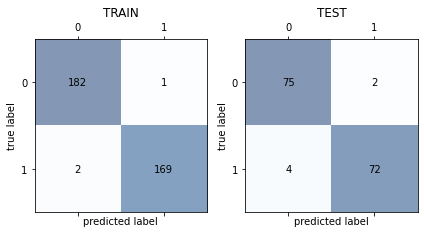

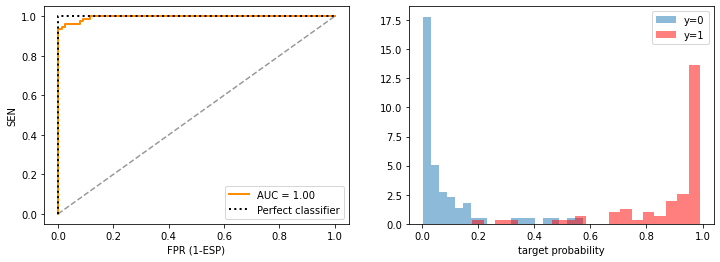

In [119]:
rf_model =  RandomForestClassifier(random_state=0,**grid_rf.best_params_).fit(X_train_norm,y_train)

analyze_train_test_performance(rf_model,X_train_norm,X_test_norm,y_train,y_test)

It does overfit a bit on the training set, however, we achieve to obtain  **96,08% accuracy, which is better than in DTs Algorithm.**

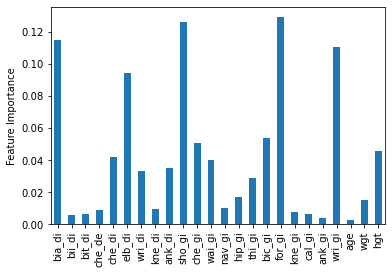

In [120]:
# 3.3 Feature importance
plot_importances(rf_model.feature_importances_, feature_names)

As we can see, RFs Algorithm **uses much more the different features, achieving a higher accuracy**. We can not get rid of most of the features since the algorithm is using them.<br>
For the features, how much a performance improves in the splits associated with that variable, we can observe above that, ***bia_di, elb_di, sho_gi, for_gi*** and ***wri_gi*** are the variables with the highest contribution in this Algorithm. <br> 

# 4. Gradient Boosting (trees) (BT)

In this case, base estimators are build sequentially and one tries to reduce the bias of the combined estimators.
As it is an iterative process, we will **increase the learning rate little by little** in order not to miss our optimal value. Large number of estimators tend to overfit the model as well as the depth of the trees.

In [122]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'n_estimators' : [50,100,200,500, 1000, 2000],
    'learning_rate': [0.1,0.05,0.01, 0.005, 0.001], 
    'max_depth': [1, 2]
} 

# Metric for the scoring
scorer = 'accuracy' 
# Our customized function
grid_gb = hyper_parameters_search(GradientBoostingClassifier(random_state=0), X_train_norm, y_train, param_grid, scorer = scorer)

best mean cross-validation score: 0.969
best parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}


PERFORMANCE METRICS
	TRAIN	TEST
ACC:	100.00	98.04
SEN:	100.00	97.37
ESP:	100.00	98.70
PPV:	100.00	98.67
F1:	100.00	98.01


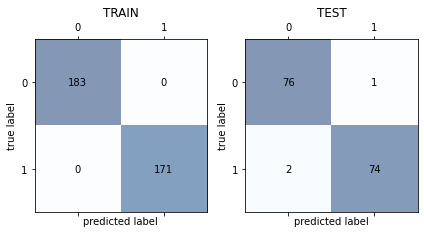

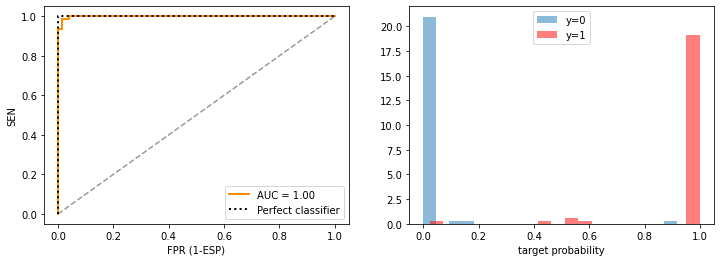

In [123]:
# 4.2 Model evaluation
gb_model = GradientBoostingClassifier(random_state=0,**grid_rf.best_params_).fit(X_train_norm,y_train)

analyze_train_test_performance(gb_model,X_train_norm,X_test_norm,y_train,y_test)



We can see how it does overfit a bit, however, we could achieve **98,04% accuracy, better results than in RFs Algrorithm.**  

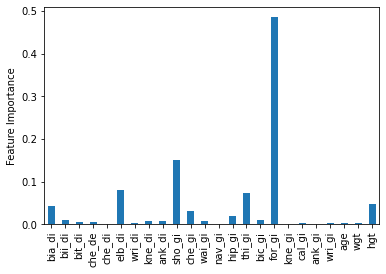

In [124]:
# 4.3 Feature importance
plot_importances(gb_model.feature_importances_, feature_names)

Regarding feature importance, with less feature than RFs Algorithm and same accuracy, ***bia_di, elb_di, sho_gi, thi_gi, hgt*** and ***for_gi*** are the features contributing the most to the achievements of this algorithm.

# 5. Multilayer Perceptron (MLP)

It is a learning algorithm (binary linear classifier): it updates the weights so that a cost function is optimized via stochastic gradient descend<br>
The inputs are combined in a weighted sum and if this sum exceeds a predefined threshold, the neuron fires and produces an output.<br>
The threshold T represents the activation function.<br>
If the weighted sum of the inputs is greater than zero th eneruon outpuets the value 1, otherwise the output value is zero.<br>
Perceptron can be used as a binary calssificaiton model defining the decision boundary. It finds the separating hyperplane that minimized the distance between misclassified points and the decision boundary.
We are going to combine perceptrons multiple layers to being able to apply it on a complex task.<br>
**This Neural Network is design to increase accuracy and avoid overfitting.** <br>

In [125]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.neural_network import MLPClassifier

param_grid = {
    'alpha' : 10.0 ** -np.arange(1, 7), # following recommendation: https://scikit-learn.org/stable/modules/neural_networks_supervised.html#tips-on-practical-use
    'hidden_layer_sizes': [(5,2), (10,2), (5,5)] # [(5 neurons, 2 hidden layer), (10 neurons, 2 hidden layer), 5 neurons, 5 hidden layers]
} 

scorer = 'accuracy' 
# Our customized function
grid_mlp = hyper_parameters_search(MLPClassifier(random_state=0), X_train_norm, y_train, param_grid, scorer = scorer)


best mean cross-validation score: 0.983
best parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (5, 2)}


Backpropagation is the learning mechanism that allows MLP to iteratively adjust te weights in the network, with the goal of minimizing the cost function.<br>

PERFORMANCE METRICS
	TRAIN	TEST
ACC:	99.72	99.35
SEN:	100.00	100.00
ESP:	99.45	98.70
PPV:	99.42	98.70
F1:	99.71	99.35


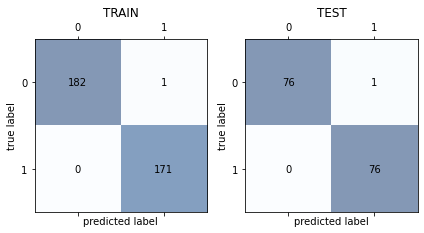

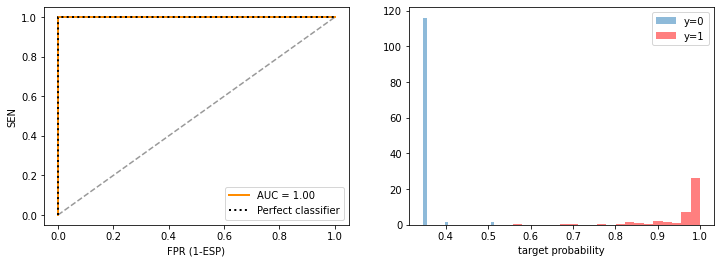

In [126]:
# 5.2 Model evaluation
mlp_model =  MLPClassifier(random_state=0,**grid_mlp.best_params_).fit(X_train_norm,y_train)

analyze_train_test_performance(mlp_model,X_train_norm,X_test_norm,y_train,y_test)


With barely no overfitting we achieve **same accuracy as our baseline model.**


# 6. Model comparison


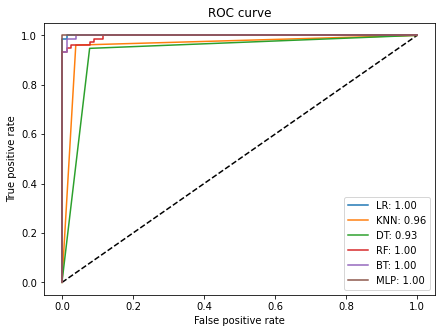

In [128]:
from sklearn.metrics import roc_curve, auc

modelos = {'LR': lr_model, 'KNN':knn_model,'DT':dt_model, 'RF': rf_model, 'BT': gb_model, 'MLP': mlp_model}

plt.figure(figsize=(7,5))
plt.plot([0, 1], [0, 1], 'k--')
for k,v in modelos.items():
    fpr, tpr,_ = roc_curve(y_test, modelos[k].predict_proba(X_test_norm)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = k + ': %0.2f' % roc_auc)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
#baseline: the better and the simplier 
#model is not being improve because data is really simple 
#increase performance: add more complexity or more data 
#data is not enough to classify those two scenarios 

On the graph above we can observe how, **multiple percerptron model** is the best for our database, meanwhile, Decisition Trees Algorithm works the worst in this case.

# Unit 5: Feature transformation and feature selection 

## 1. Feature Selection

The aim of feature selection is to select the optimum subset of features/variables in order to reduce the dimensionality of the dataset (and thus mitigating the potential overfitting) and improve interpretability.<br>
This way, we will provide better understanding of the underlaying process that generates the data<br>




- It enables the machine learning algortihm to train faster.
- It reduces the complexity of a model and makes it easier to interpret.
- It improves the accuracy of a model if the rigth subset is chosen.
- It reduces overfitting.

## 1.A Filter methods 

Filter methods rank the input features according to a predefined relevance score, so that low-scored variables are removed. Selected variables constituted the input space of the ML algorithm.<br>

Filter methods are generally used as a preprocessing step.<br>
Features are selected on the basis of their scores in various statistical tests for the correlation with the outcome variable.<br>
Filter methods do not remove multicollinearity, so you must deal with multicollinearity of features as well before training models for your data.<br>

In [173]:
from src1.filter_methods import filter_methods_classification

In [174]:
from src1.ddbb import load_bdim
X, y = load_bdim('bdim.csv')

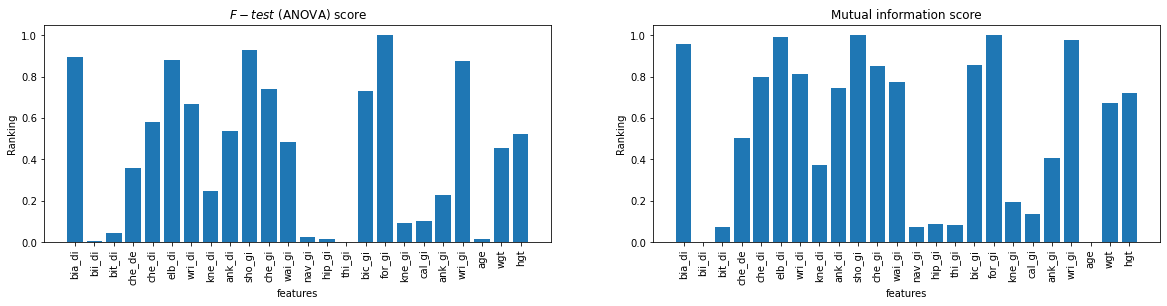

In [131]:
# Let's apply filter methods
filter_methods_classification(X.values, y.values, feat_names = X.columns, rotation=True)

Looking at the graphs above, we will choose, ***elb_di, for_gi*** and ***wri_gi***.

Now we fit a KNN Algorithm on those futures.

PERFORMANCE METRICS
	TRAIN	TEST
ACC:	91.32	92.91
SEN:	88.65	91.94
ESP:	93.85	93.85
PPV:	93.18	93.44
F1:	90.86	92.68


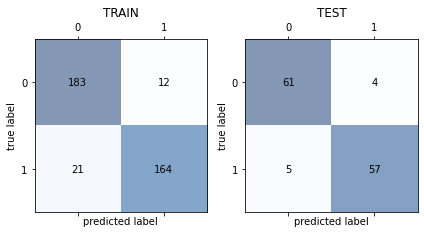

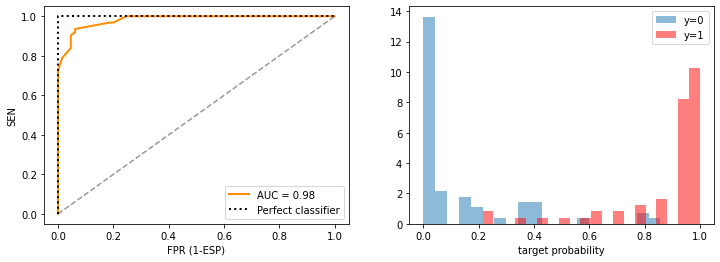

Selected features:  ['elb_di' 'for_gi' 'wri_gi']


In [133]:
# Pipeline
from sklearn.pipeline import make_pipeline

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Customized function
from src1.ml_utils import analyze_train_test_performance


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)

# We use a pipeline here, instead of running things one after another, we use a methodology, first a standard, 
#then select better variables using mutual information , then we run a gridsearch, in which 
#we are doing iterations using our neightboors 

my_model = make_pipeline(
    StandardScaler(),
    SelectKBest(mutual_info_classif, k=3), 
    GridSearchCV(KNeighborsClassifier(), {'n_neighbors': range(1,50)}, cv=3),
)
my_model.fit(X_train, y_train)

# Analyze performance
analyze_train_test_performance(my_model,X_train,X_test,y_train,y_test)

# Selected features
features = X.columns
mask = my_model.named_steps['selectkbest'].get_support()
selected_features = features[mask].values

print('Selected features: ', selected_features)

The model does not overfit, accuracy is pretty high with a score of **92,21%**, there is some overlapping in the middle but overall it is a good result.

## 1.B Wrapper methods

Wrappers utilize a machine learning algorithm of interest as a **black box** to score subsets of variables according to their predictive power. When estimating the number of selected features the normally use **backward/forward** procedures together with **cross-validation** techniques to assess the performance of each subset. 


We try to use a subset of features and train a model using them. The problem is reduced to a search problem. 
Examples of wrapper methods are:<br>
- **Forward Selection**:an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till addition of a new variable does not improve the performance of the model.
- **Backward Elimination**: we start with all features and removes the least significance feature at each iteration which improves the performance of the model. We repreat this until no improvement is observed in removal of features.
- **Recursive Feature Elimination**: it is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly created models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

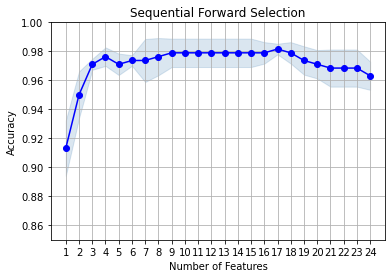

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(16,)","[0.9133858267716536, 0.889763779527559, 0.9365...",0.913219,"(for_gi,)",0.0429444,0.0190836,0.0134941
2,"(14, 16)","[0.9291338582677166, 0.952755905511811, 0.9682...",0.950048,"(thi_gi, for_gi)",0.0361968,0.0160851,0.0113739
3,"(14, 16, 23)","[0.968503937007874, 0.9763779527559056, 0.9682...",0.971045,"(thi_gi, for_gi, hgt)",0.00848857,0.00377215,0.00266731
4,"(10, 14, 16, 23)","[0.9763779527559056, 0.968503937007874, 0.9841...",0.976336,"(che_gi, thi_gi, for_gi, hgt)",0.0143529,0.00637815,0.00451003
5,"(10, 14, 16, 19, 23)","[0.9606299212598425, 0.9763779527559056, 0.976...",0.971066,"(che_gi, thi_gi, for_gi, ank_gi, hgt)",0.0166072,0.0073799,0.00521838
6,"(10, 13, 14, 16, 19, 23)","[0.968503937007874, 0.9763779527559056, 0.9761...",0.973691,"(che_gi, hip_gi, thi_gi, for_gi, ank_gi, hgt)",0.00825524,0.00366846,0.00259399
7,"(0, 10, 13, 14, 16, 19, 23)","[0.952755905511811, 0.984251968503937, 0.98412...",0.973712,"(bia_di, che_gi, hip_gi, thi_gi, for_gi, ank_g...",0.0333454,0.014818,0.0104779
8,"(0, 5, 10, 13, 14, 16, 19, 23)","[0.9606299212598425, 0.9763779527559056, 0.992...",0.976357,"(bia_di, elb_di, che_gi, hip_gi, thi_gi, for_g...",0.0288778,0.0128327,0.0090741
9,"(0, 1, 5, 10, 13, 14, 16, 19, 23)","[0.968503937007874, 0.9763779527559056, 0.9920...",0.978982,"(bia_di, bii_di, elb_di, che_gi, hip_gi, thi_g...",0.022037,0.00979279,0.00692455
10,"(0, 1, 2, 5, 10, 13, 14, 16, 19, 23)","[0.968503937007874, 0.9763779527559056, 0.9920...",0.978982,"(bia_di, bii_di, bit_di, elb_di, che_gi, hip_g...",0.022037,0.00979279,0.00692455


In [176]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=2, stratify=y)

# Standardization
scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm  = scaler.transform(X_test)

# Feature Selection analysis
knn = KNeighborsClassifier(n_neighbors=23)
sfs = SFS(knn, 
          k_features=X.shape[1], 
          forward=True, 
          scoring='accuracy',
          cv=3)

sfs = sfs.fit(X_train_norm, y_train, custom_feature_names=X.columns)

# Plotting the results
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev', ylabel = 'Accuracy')
plt.ylim([0.85, 1.0])
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

pd.DataFrame.from_dict(sfs.get_metric_dict()).T

As we can see, with **17 features** we achieve the higher score (98%)

### Using the Selected Feature Subset For Making New Predictions

Selected features: ('che_gi', 'hip_gi', 'thi_gi', 'for_gi', 'ank_gi', 'hgt')
PERFORMANCE METRICS
	TRAIN	TEST
ACC:	97.37	95.28
SEN:	96.22	91.94
ESP:	98.46	98.46
PPV:	98.34	98.28
F1:	97.27	95.00


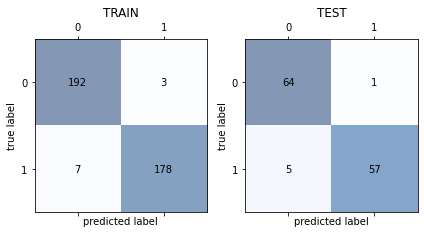

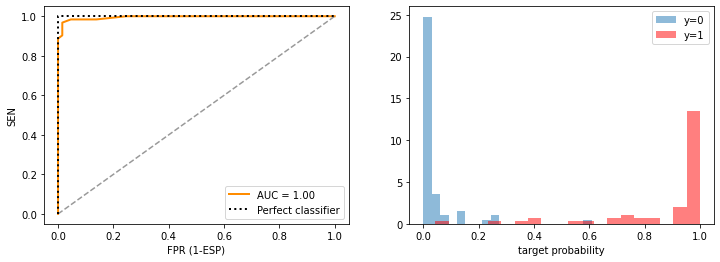

In [135]:
knn = KNeighborsClassifier(n_neighbors=23)
sfs = SFS(knn, 
          k_features=6, #it has less error, look at the table up 
          forward=True, 
          scoring='accuracy',
          cv=3)

sfs = sfs.fit(X_train_norm, y_train, custom_feature_names=X.columns)

print('Selected features:', sfs.k_feature_names_)

X_train_fs = sfs.transform(X_train_norm)
X_test_fs  = sfs.transform(X_test_norm)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
knn_fs = knn.fit(X_train_fs, y_train)

analyze_train_test_performance(knn_fs,X_train_fs,X_test_fs,y_train,y_test)

When choosing the 6 features selected by the algorithm we **achieve a higher accuracy (95,28%)**.

### Sequential Backward Selection


Selected features: ('for_gi',)
PERFORMANCE METRICS
	TRAIN	TEST
ACC:	91.32	87.40
SEN:	94.59	83.87
ESP:	88.21	90.77
PPV:	88.38	89.66
F1:	91.38	86.67


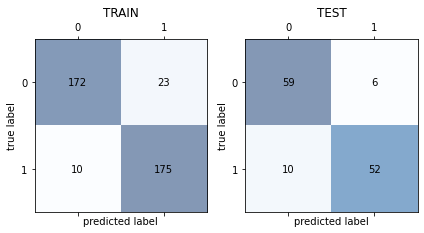

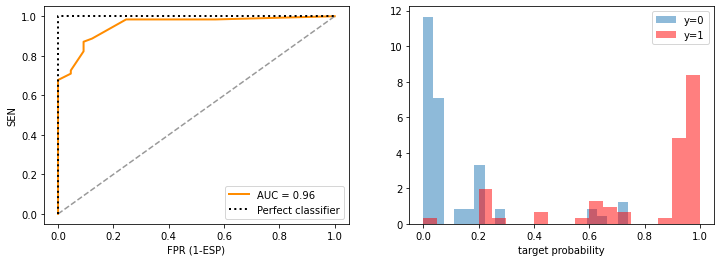

In [139]:
knn = KNeighborsClassifier(n_neighbors=23)
sfs = SFS(knn, 
          k_features=1, 
          scoring='accuracy',
          cv=3)

sfs = sfs.fit(X_train_norm, y_train, custom_feature_names=X.columns)

print('Selected features:', sfs.k_feature_names_)

X_train_fs = sfs.transform(X_train_norm)
X_test_fs  = sfs.transform(X_test_norm)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
knn_fs = knn.fit(X_train_fs, y_train)

analyze_train_test_performance(knn_fs,X_train_fs,X_test_fs,y_train,y_test)

The algorithm only selects one feature **for_gi** which decreases significatively the accuracy (87,40%). 

### Sequential Feature Selection and GridSearch


In [198]:

sfs = SFS(estimator=knn, 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=3)


Selected features: ('kne_gi',)
PERFORMANCE METRICS
	TRAIN	TEST
ACC:	60.53	44.09
SEN:	56.22	38.71
ESP:	64.62	49.23
PPV:	60.12	42.11
F1:	58.10	40.34


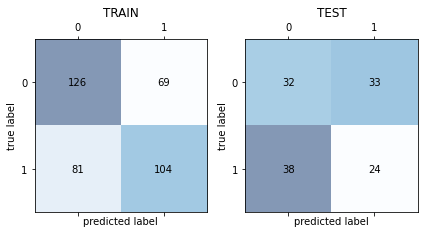

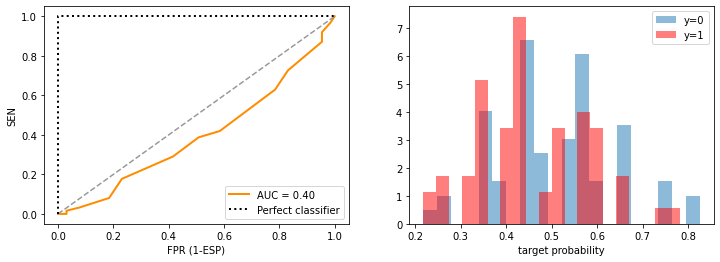

In [199]:
sfs = sfs.fit(X_train_norm, y_train, custom_feature_names=X.columns)
print('Selected features:', sfs.k_feature_names_)

X_train_fs = sfs.transform(X_train_norm)
X_test_fs  = sfs.transform(X_test_norm)

knn_fs = knn.fit(X_train_fs, y_train)

analyze_train_test_performance(knn_fs,X_train_fs,X_test_fs,y_train,y_test)

We can observe how using sequential foward selection does not work well with our data set with an accuracy of only 44,09% since it only uses a feature (knee_gi) with no relevant contribution

## 1.C Embedded Methods



Embedded methods perform feature selection during the modelling algorithm's execution. Common embedded methods include Decision Trees, Random Forest, Lasso, Support Vector Machines, among others.<br>
We will incorporate the feature selection as a part of the training process, using recursively elimination (search procedure is guided by estimating changes in the objective function for different subsets of features) we will optimaze the process.


It combines the qualities of filter and wrapper methods. It is implemented by algorithms that have their own built-in feature selection methods.<br>
It uses:<br>
- Lasso regressions perfomrs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.
- Ridge regression performs L2 regularization which adss penalty equivalent to square of the magnitude of coefficients.

### An extended feature selection method among practitioners

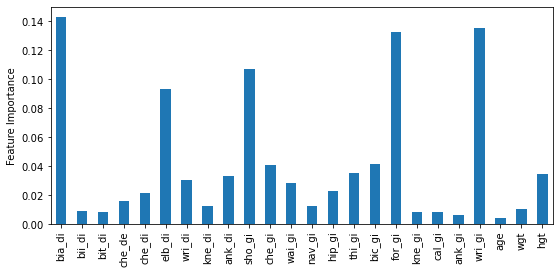

- Selected features:  Index(['bia_di', 'elb_di', 'ank_di', 'sho_gi', 'che_gi', 'bic_gi', 'for_gi',
       'wri_gi'],
      dtype='object')
- Threshold (mean importance):  0.041666666666666664


In [141]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from src1.ml_utils import plot_importances

# Load the data
X, y = load_bdim('./bdim.csv')

clf = RandomForestClassifier().fit(X, y)
plot_importances(clf.feature_importances_, X.columns)

# Selection
selector = SelectFromModel(clf).fit(X,y) #selected features
print('- Selected features: ', X.columns[selector.get_support()])
print('- Threshold (mean importance): ', selector.threshold_)

PERFORMANCE METRICS
	TRAIN	TEST
ACC:	92.63	92.13
SEN:	92.97	95.16
ESP:	92.31	89.23
PPV:	91.98	89.39
F1:	92.47	92.19


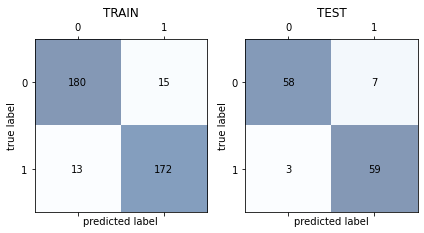

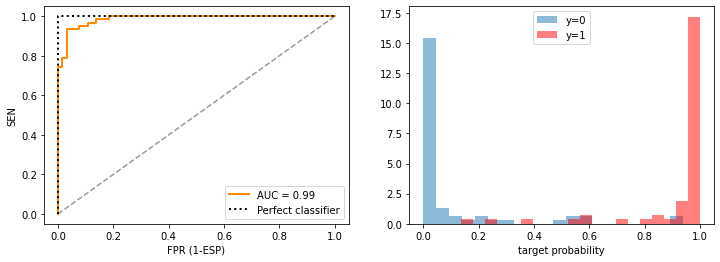

Selected features ['bia_di' 'elb_di' 'sho_gi' 'che_gi' 'bic_gi' 'for_gi' 'wri_gi']


In [190]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)

from sklearn.pipeline import Pipeline


embeded_fs = make_pipeline(
    SelectFromModel(RandomForestClassifier(random_state=0)),
    LogisticRegression()
)
    
embeded_fs.fit(X_train, y_train)
analyze_train_test_performance(embeded_fs,X_train, X_test, y_train, y_test)

#select features 
features=X.columns
mask=embeded_fs.named_steps['selectfrommodel'].get_support()
selected_features=features[mask].values
print('Selected features', selected_features)

**2. Is it worth performing feature selection in your dataset? Justify your answer. If you decide to perform feature selection, you might want to ...** <br>
In our case, on this dataset it is not worth it, comparing results obtained on lab 4, accuracy decreases a lot more using feature selection. The only we could consider using feature selection on this dataset is to decrease overfitting since on lab 4, training set is always giving very high accuracy. It is a trade-off between acuracy and overfitting. <br>
In our dataset, we do see a difference between between filter methods, Wrapper methods and Embeded methods. Since Embeded methods only achieve a 51% accuracy, and in filter methods the predicted values and the selected features are the same: **elb_di**, **for_gi**, and **wri_gi** and  a 92% accuracy, the best option will be Wrapper methods, which filters out irrelevant variables, only having 17 features instead of 24 and achieving a 95% accuracy.


### Recursive Feature Elimination



Optimal number of features : 19


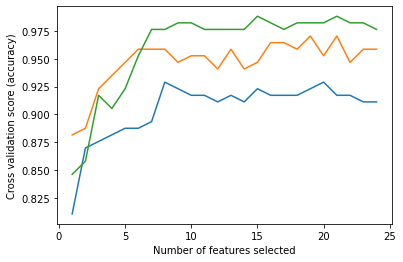

In [144]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(
    estimator=RandomForestClassifier(random_state=0),
    step=1,
    cv=3,
    scoring="accuracy",
    min_features_to_select=1,
)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1),rfecv.grid_scores_)
plt.show()

Only **19 features** out of the total features we have are optimal for processing our algorithms, thus we proceed to feature extraction so we can downgrade dimensionality of our plane making it easier to compute our code. 

# 2. Feature Extraction / dimensionality reduction



The differences with features selection is that; we create new features, instead of selecting a subset of them and we do not consider class labels, just the data

In [145]:
from src1.ddbb import load_bdim

X, y = load_bdim('./bdim.csv')

***explicar***

**1. Is it worth transforming and/or creating new features based on the data distribution or your domain knowledge? Justify your answer.** <br>
It is worth it, as we can see on the graph below, both sets are almost completly separated. 
    - Comment on variable(s) to be transfomed
    ni idea
    - Comment on variable(s) to be created
    ni idea

## 2.1 PCA



This transformation retains the 62.49% of the variance


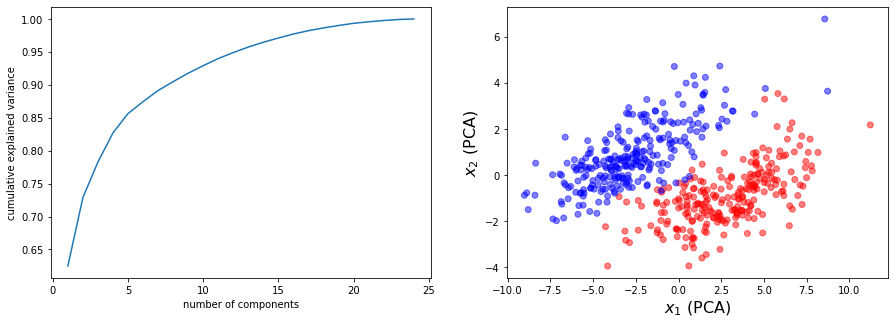

In [147]:
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

X, y = load_bdim('./bdim.csv')

# scaling
X_scaled = StandardScaler().fit_transform(X)

# Number of components
pca = PCA().fit(X_scaled)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(1,X.shape[1]+1),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Data visualization (just 2 components)
X_pca = PCA(n_components=2).fit_transform(X_scaled)

plt.subplot(1,2,2)
plt.scatter(X_pca[:,0],X_pca[:,1],c=-1*y, cmap=cm_bright, alpha=0.5)
plt.xlabel('$x_1$ (PCA)',fontsize=16)
plt.ylabel('$x_2$ (PCA)',fontsize=16)
print('This transformation retains the {:.2f}% of the variance'.format(100*pca.explained_variance_ratio_[0]))

plt.show()

### Explainability



In [67]:
lr =  LogisticRegression().fit(X_pca, y)
print('ACC: {:.3f}'.format(lr.score(X_pca, y)))

ACC: 0.978


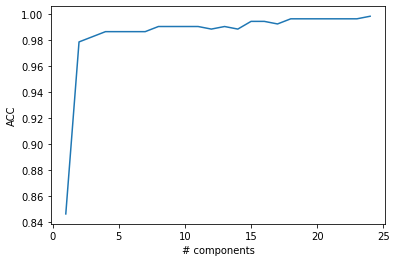

In [68]:
acc_score = [] 
for i in range(1,X.shape[1]+1):
    X_pca = PCA(n_components=i).fit_transform(X_scaled)
    lr =  LogisticRegression().fit(X_pca, y)
    acc_score.append(lr.score(X_pca, y))

plt.plot(np.arange(X.shape[1])+1,acc_score)
plt.xlabel('# components')
plt.ylabel('ACC')
plt.show()

**3. Is it worth applying PCA to your dataset? Justify your answer. If you decide to apply PCA, you might want to...**<br>
In our case, applying PCA is worth it, since with less components we achieve the highest accuracy. If you take a look at the graph above, you can see how accuracy increases to 97,8% with less than 5 components.<br> 
We can observe how with the dimensionality reduction (from 2D to 1D), this transformation retains the 62.49% of the variance. Decreasing the variance allows to decrease the overfitting of the model, which in our case is crucial, since our database tends to overfit in all the scenarios. <br>
Hyperplanes x1 and x2 appear almost completely separate, achieving a 98% accuracy with less components than in the feature selection (higher accuracy with less number of components).<br>

# Unit 6: Unsupervised Learning

Unsupervised learning does not contain any label information, learning algorithm just show the input data and asked to extract patterns from data. The challenge in this case consists on evaluating whether the algorithm learned something useful.  







In [148]:
from src2.utils import plot_scatter, plot_silhouette

# 1. K-means

The algorithm alternates between two steps:<br>
    1. assigning each data point to the closest cluster center<br>
    2. setting each cluster center (centroid) as the mean of the data points that are assigned to it<br>

As we have seen before, both **for_gi** and **hgt** we important features for the algorithm development. The main drawback of this algorithm is that we have to select the number of clusters we want, for this case, we will choose 2, since data can be well define this way. 

In [201]:
from sklearn.preprocessing import StandardScaler
X1 = X[['hgt','for_gi']].values
X1 = StandardScaler().fit_transform(X1)

In [202]:
X1.shape

(507, 2)

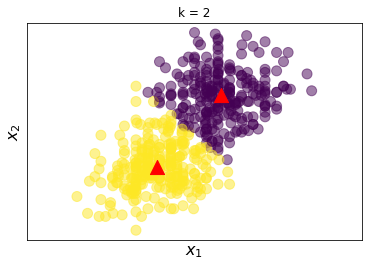

In [203]:
from sklearn.cluster import KMeans

# build the clustering model
k = 2
kmeans = KMeans(n_clusters = k).fit(X1)

# Centroids 
centroids = kmeans.cluster_centers_

# Labels
cluster_labels = kmeans.labels_

# do the plotting
plot_scatter(X1,'k = ' + str(k), cluster_labels, centroids)
plt.show()

With 2 clusters, both **hyperplanes x1 and x2 are almost completely separate**, which mean we are able to differenciate properly both clusters.

In [204]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

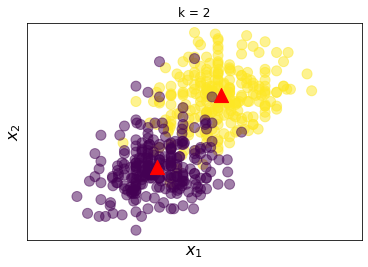

In [153]:
# do the plotting
plot_scatter(X1,'k = ' + str(k), y, centroids)
plt.show()

If we use target variable y results are a bit worse, the purpose is to **group our observations not classify** them (so there might be subgroups within our observations having the same or differente outcome).

In [205]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### How many cluster are there?

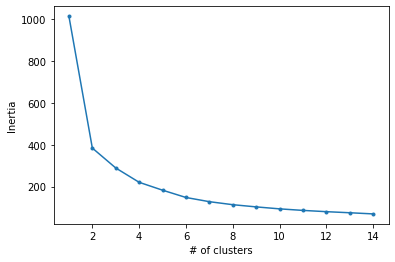

In [154]:
K = range(1,15)

inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X1)
    inertia.append(kmeans.inertia_)
    
plt.plot(K,inertia,'.-')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

We put K in a range. The inertia is reduced, when we increase the number of clusters, which means that with less clusters the algorithm works better.

#### Use the silhouette analysis

This analysis is used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like numer of cluster visually.

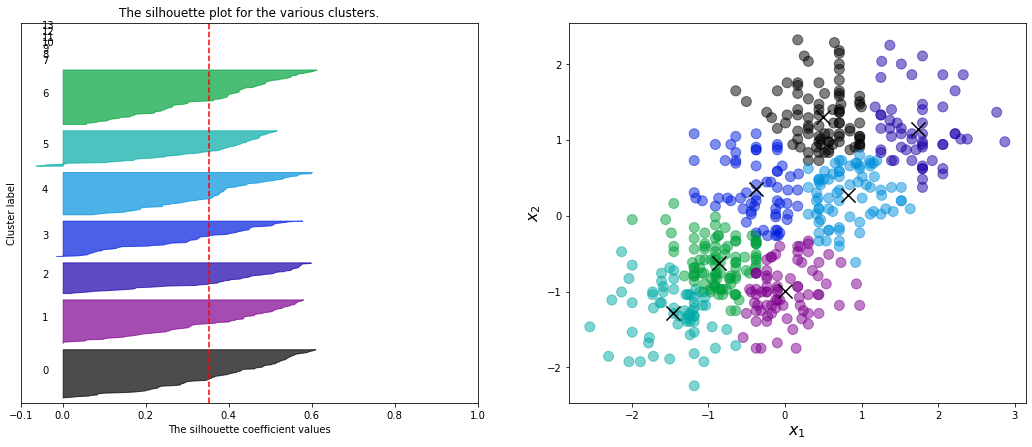

In [156]:
kmeans = KMeans(n_clusters=7).fit(X1)
plot_silhouette(X1,k,kmeans.labels_,kmeans.cluster_centers_)

With this graphics we know that we can have 7 clusters in our data.

In the graphics on the left we can see that the silhouette coefficient is a little more than 0.3.

We know that a value o 0 indicates that the sample is very close to the decision boundary between two neighboring clusters, negative values indicate that the samples migth have been assigned to the wrong cluster, and values near to +1 indicate that the sample is far away from the neighboring clusters.

So we can say that our sample is quite close to the neighbor cluster.

In the graphic on the rigth we see the 7 clusters with their centroids. They have different colors, which appear in the ohther graphc, and the centroid is marked with a cross.

### Let's analyze our observations depending on the cluster label

In [157]:
df = X.copy()
df['cluster_label'] = cluster_labels
df.head()

,bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,sho_gi,...,bic_gi,for_gi,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,cluster_label
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,0
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,0
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,0
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,0
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,0


In [78]:
df[df.cluster_label==0]

,bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,sho_gi,...,bic_gi,for_gi,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,cluster_label
28,39.4,25.5,30.2,17.6,27.7,13.0,10.2,18.9,13.2,107.8,...,31.2,26.5,37.0,37.4,21.5,16.5,23,63.2,164.5,0
29,40.2,27.2,31.7,18.1,26.5,13.3,10.1,18.6,13.2,100.2,...,27.5,24.8,34.0,32.8,21.0,15.6,19,60.9,173.0,0
35,41.5,24.5,30.5,17.7,26.7,13.3,10.8,18.6,14.0,104.0,...,29.0,26.0,36.0,34.5,21.5,17.0,20,59.5,170.0,0
37,38.8,27.2,31.6,18.5,25.5,13.4,10.8,19.0,14.0,108.0,...,29.5,24.5,36.1,37.2,22.9,16.0,24,61.3,170.0,0
49,37.6,24.4,28.0,18.0,26.4,14.2,10.6,17.3,13.4,108.4,...,30.8,26.1,31.7,33.6,20.3,15.8,29,59.1,167.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,36.5,29.7,34.0,20.2,28.5,13.3,9.8,18.9,12.4,104.0,...,32.3,26.4,35.7,37.0,21.4,15.8,40,76.8,157.5,0
503,35.3,28.7,30.4,17.7,25.6,12.4,9.8,17.3,13.6,99.3,...,30.1,23.6,35.6,33.3,22.4,15.2,21,55.5,164.4,0
504,34.7,24.9,24.7,17.3,24.2,12.0,10.2,18.0,13.6,91.9,...,27.4,24.0,34.4,34.1,21.2,15.5,33,48.6,160.7,0
505,38.5,29.0,32.9,15.3,25.6,12.0,9.8,18.6,13.3,107.1,...,30.6,24.9,38.4,36.6,22.0,15.5,33,66.4,174.0,0


### PCA & K-means

Two options here:
    
1. K-means + PCA representation
2. PCA dimensionality reduction + K-means

**Option 1:**

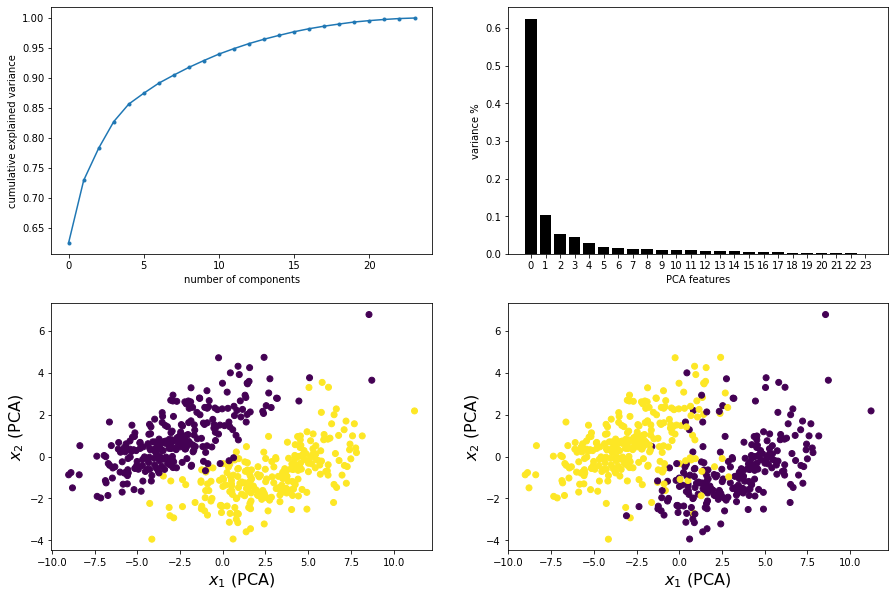

In [160]:
from sklearn.decomposition import PCA

# scaling
X_scaled = StandardScaler().fit_transform(X)

# Number of components
pca = PCA().fit(X_scaled)
X_pca = PCA(n_components=2).fit_transform(X_scaled)

# Data visualization (just 2 components)
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(np.cumsum(pca.explained_variance_ratio_),'.-')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.subplot(2,2,2)
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(range(pca.n_components_))

plt.subplot(2,2,3)
plt.scatter(X_pca[:,0],X_pca[:,1], c=y)
plt.xlabel('$x_1$ (PCA)',fontsize=16)
plt.ylabel('$x_2$ (PCA)',fontsize=16)

plt.subplot(2,2,4)
plt.scatter(X_pca[:,0],X_pca[:,1], c=cluster_labels)
plt.xlabel('$x_1$ (PCA)',fontsize=16)
plt.ylabel('$x_2$ (PCA)',fontsize=16)

plt.show()

Here we can see more graphics.

The first one, up and on the left, shows the amount of variance depending on the number of components we include. A rule of thumb us to preserve around 80% of the variance, so in this case we dcide to keep 4 components.

The second graph shows the PCA features, 7 in our database, and the percentage of variance of eahc of them.

The third graph shows the two clusters.

The last graphic shows the seven clusters.

#### Option 2:

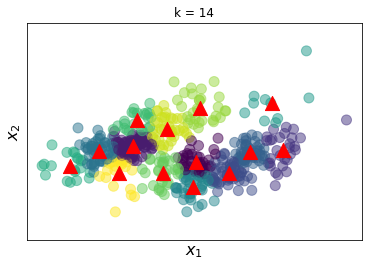

In [161]:
X_pca = PCA(n_components=2).fit_transform(X_scaled)
kmeans = KMeans(n_clusters = k).fit(X_pca)

# Centroids 
centroids = kmeans.cluster_centers_

# Labels
cluster_labels = kmeans.labels_

# do the plotting
plot_scatter(X_pca,'k = ' + str(k), cluster_labels, centroids)
plt.show()

**1. Apply the k-means algorithm to your dataset, was it helpful? Did you get any insight? Comment on the number of cluster you used.**<br>
In the first option, **K-means + PCA representation** with two components on the PCA analysis, we achieve a variance of less than 0,1 thus it was helpful. **explicar mejor**<br>
In the second option, **PCA dimensionality reduction + K-means**, the dimensionality reduction turns out to be a lot more helpful than the before case, thus we can differenciate till 14 different clusters.


# 2. Hierarchical clustering

Family of clustering algorithms that build nested clusters by merging or splitting them successively, so  we do not have to assume any particular number of clusters. <br>
Using the **ward linkage criteria** minimizes the sum of squared differences within all clusters.

We can use agglomerative hierarchical algorithmm, in which each data point is treated as a single cluster and then successively merge or agglomerate the pairs of clusters. The hierarchy is represented as a denogram or tree structure.


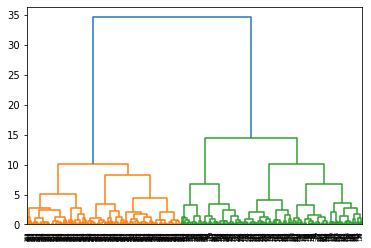

In [162]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X1, 'ward')
dendrogram(Z)
plt.show()

The role of denograms start once the big cluster is formed. Denogram will be used to split the clusters into multiple cluster of realted data points dependong on our problem.

We plot the denograms. Once the big cluster is formed, the longest vertical distance is selected. A vertical blue line is drawn through.

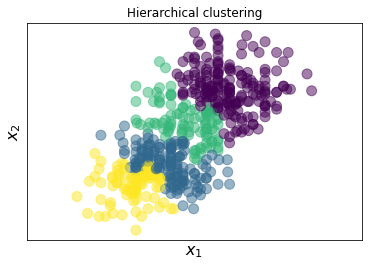

In [166]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4).fit(X1)
plot_scatter(X1,'Hierarchical clustering', agg.labels_) 

Using **4 clusters** is enough to separate our data into 4 different subgroups 

**2. What if you used Hierarchical clustering? Any differences?**<br>

**PCA creates a low-dimensional representation** of the samples from a data set which is optimal in the sense that it contains as much of the variance in the original data set as is possible. PCA also provides a variable representation that is directly connected to the sample representation, and which allows the user to visually find variables that are characteristic for specific sample groups. <br>

(Agglomerative) **hierarchical clustering builds a tree-like structure (a dendrogram) where the leaves are the individual objects** (samples or variables) and the algorithm successively pairs together objects showing the highest degree of similarity. These objects are then collapsed into a pseudo-object (a cluster) and treated as a single object in all subsequent steps.<br>
The input to a **hierarchical clustering algorithm consists of the measurement of the similarity** (or dissimilarity) between each pair of objects, and the choice of the similarity measure can have a large effect on the result.<br>

The goal of the clustering algorithm is then to partition the objects into homogeneous groups, such that the within-group similarities are large compared to the between-group similarities. **The principal components, on the other hand, are extracted to represent the patterns encoding the highest variance in the data set** and not to maximize the separation between groups of samples directly. However, in many high-dimensional real-world data sets, the most dominant patterns, i.e. those captured by the first principal components, are those separating different subgroups of the samples from each other. In this case, the results from PCA and hierarchical clustering support similar interpretations.<br>
In hierarchical clustering depicting the data matrix in this way can help to find the variables that appear to be characteristic for each sample cluster. On the other hand, in PCA, **the synchronized variable representation provides the variables that are most closely linked to any groups emerging in the sample representation.**<br>

Since PCA represents the data set in only a few dimensions, some of the **information in the data is filtered out** in the process. The discarded information is associated with the weakest signals and the least correlated variables in the data set, and it can often be safely assumed that much of it corresponds to measurement errors and noise.
This makes the **patterns revealed using PCA cleaner and easier to interpret** than those seen in the heatmap, albeit at the risk of excluding weak but important patterns.<br>
Finally, another difference is that the **hierarchical clustering will always calculate clusters**, even if there is no strong signal in the data, in contrast to PCA which in this case will present a plot similar to a cloud with samples evenly distributed.<br>
In conclusion, it is a trade-off between loosing information and getting cleaner information, apart from the difference in representation. In our case, both methods give similar results.

## Bibliography 

[1]. KDnuggets. (n.d.). A comparison between PCA and hierarchical clustering. [online] Available at: https://www.kdnuggets.com/2016/02/qlucore-comparison-pca-hierarchical-clustering.html.<br>
[2]. Anon, (n.d.). » How to determine the quality and correctness of classification models? Part 2 – Quantitative quality indicators. [online] Available at: https://algolytics.com/how-to-determine-the-quality-and-correctness-of-classification-models-part-2-quantitative-quality-indicators/ [Accessed 3 Jan. 2022].<br>
[3]. Cross Validated. (n.d.). machine learning - Why does a decision tree have low bias & high variance? [online] Available at: https://stats.stackexchange.com/questions/262794/why-does-a-decision-tree-have-low-bias-high-variance [Accessed 3 Jan. 2022].

